In [1]:
import os
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dnaso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
folder = 'test-transcripts/'

# load files
def load_documents(folder_path):
    transcripts = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                text = file.read().replace('\n', ' ')
                transcripts.append(text)
    return transcripts

nlp = spacy.load("en_core_web_sm")

# set stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = ['like', 'yeah', 'know', 'um', 'uh', 'really', 'one', 'go', 'first']
broad_terms = ['philippines', 'filipino']
stop_words.update(custom_stop_words, broad_terms)

# generate entity from file
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text.lower() for ent in doc.ents if ent.text.lower() not in stop_words]
    print(entities)
    return entities

In [75]:
documents = load_documents(folder)

lemmatizer = WordNetLemmatizer()

def preprocess_text(doc, entities):
    tokens = word_tokenize(doc.lower()) 
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    tokens.extend(entities * 2) 
    return tokens

entity_docs = [extract_named_entities(doc) for doc in documents]


['18', 'mabuhay', 'arwen', 'nd', 'today', '18', '18', '18', 'three', 'spanish', 'english', 'arabic french', 'english', 'arabic', 'english', 'french', 'spanish', 'portuguese', 'marilyn', 'marlon arlen', 'today', '18', 'english', 'tagalog', 'kuleana', 'english', 'six', 'iris', 'english', 'english', 'english', 'english', 'english', 'english', 'susan', 'the age of 12', 'only two', 'spanish', 'oceanus', 'jc de', 'lo cuando viene una película de ella', 'la película', 'spinola', 'spanish', 'de gallo', 'antonia', 'ania', 'libra', 'kaiser janos', 'ahora la lengua', 'la lengua', 'filipina', 'italian', 'english', 'tagalog spanish', 'italian', 'spanish', 'quando finita la', 'mia de tocqueville yo', 'el dorado', 'tata traverso', 'lepovitz', 'pereira de oh aloha alaura', 'italian', 'italian', 'penelope', 'spanish', 'amici karat', 'carlo', 'deacon', 'napoli', 'napoli', 'utah', 'italian', 'french', 'french', 'hispaniola 3d', 'french', 'spanish', 'italian', 'bush', 'french', 'kinsey', 'french', 'portug

In [76]:
preprocessed_docs = [preprocess_text(doc, entities) for doc, entities in zip(documents, entity_docs)]

for i, doc in enumerate(preprocessed_docs):
    print(f"Document {i + 1}:")
    print(doc)
    print()

Document 1:
['language', 'beautiful', 'people', 'mabuhay', 'magandang', 'arwen', 'welcome', 'back', 'mg', 'nd', 'echo', 'today', 'reacting', 'kid', 'teen', 'old', 'apparently', 'speak', 'language', 'mean', 'sure', 'even', 'sure', 'true', 'mean', 'mean', 'maybe', 'speak', 'enunciate', 'sentence', 'language', 'actually', 'speak', 'language', 'fluently', 'would', 'impressive', 'interesting', 'speak', 'three', 'language', 'fluently', 'spanish', 'little', 'bit', 'interesting', 'plus', 'globalization', 'mixed', 'couple', 'everything', 'bound', 'happen', 'people', 'speak', 'multiple', 'language', 'even', 'english', 'considered', 'international', 'language', 'impressive', 'mean', 'real', 'dude', 'wait', 'see', 'language', 'speak', 'fluently', 'arabic', 'french', 'english', 'pretty', 'sure', 'arabic', 'pretty', 'sure', 'english', 'french', 'spanish', 'language', 'maybe', 'even', 'portuguese', 'see', 'right', 'stop', 'please', 'consider', 'follow', 'instagram', 'music', 'game', 'news', 'alright'

In [77]:
dictionary = corpora.Dictionary(entity_docs)
corpus = [dictionary.doc2bow(doc) for doc in entity_docs]

lda_model = LdaModel(corpus, num_topics=15, id2word=dictionary, passes=15, random_state=42, alpha='auto', per_word_topics=True)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.019*"three" + 0.011*"two" + 0.011*"today" + 0.010*"dan" + 0.008*"twitter" + 0.007*"makati" + 0.007*"johnny" + 0.006*"london" + 0.006*"tonight" + 0.006*"youtube"
Topic 1: 0.026*"youtube" + 0.019*"two" + 0.012*"second" + 0.010*"today" + 0.009*"jollibee" + 0.007*"three" + 0.005*"america" + 0.005*"yesterday" + 0.004*"filipinos" + 0.004*"10"
Topic 2: 0.023*"third" + 0.021*"korean" + 0.011*"today" + 0.011*"filipinos" + 0.010*"japanese" + 0.010*"asian" + 0.008*"chinese" + 0.008*"philippine" + 0.008*"two" + 0.008*"southeast asia"
Topic 3: 0.016*"two" + 0.008*"today" + 0.008*"manila" + 0.007*"montreal" + 0.006*"robin" + 0.006*"gabe" + 0.005*"4th" + 0.005*"patrick" + 0.005*"katrina" + 0.004*"america"
Topic 4: 0.028*"tonight" + 0.027*"two" + 0.027*"josh taylor" + 0.019*"taylor" + 0.009*"josh" + 0.009*"rosario" + 0.009*"rivera" + 0.008*"madison square garden" + 0.006*"today" + 0.006*"three"
Topic 5: 0.029*"el nido" + 0.020*"filipinos" + 0.016*"philippine" + 0.008*"today" + 0.008*"alona 

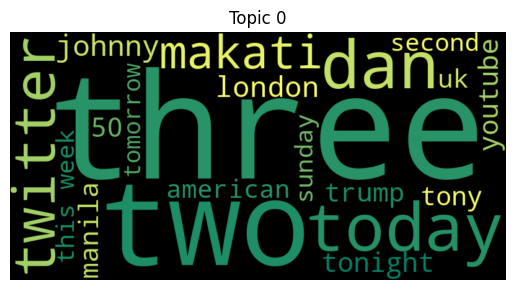

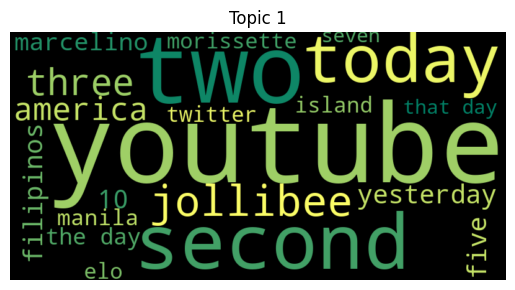

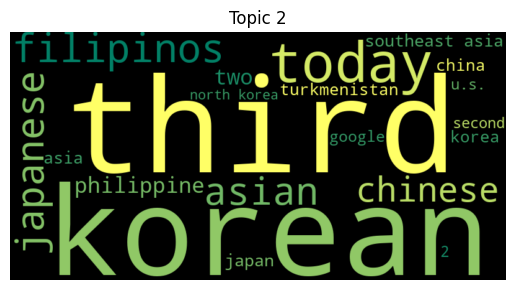

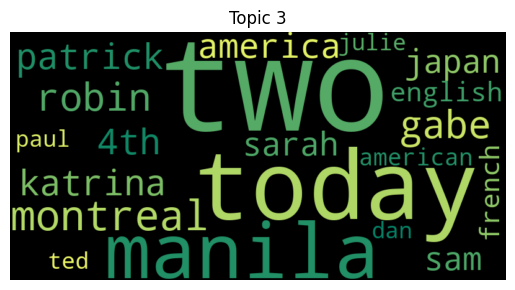

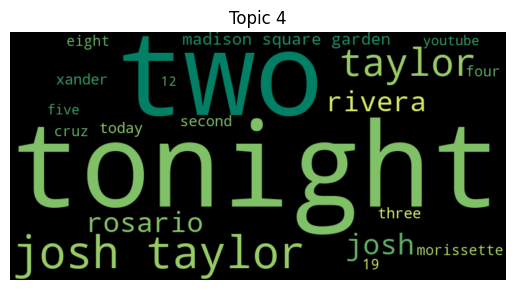

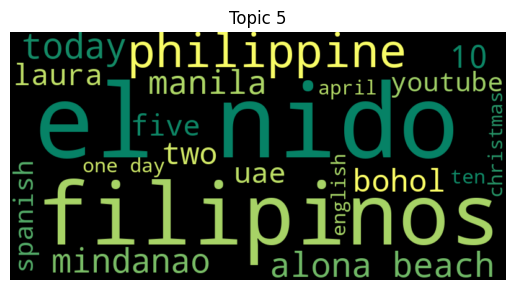

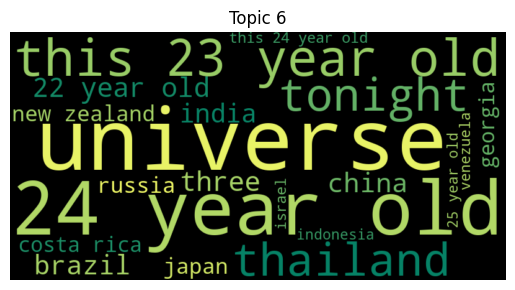

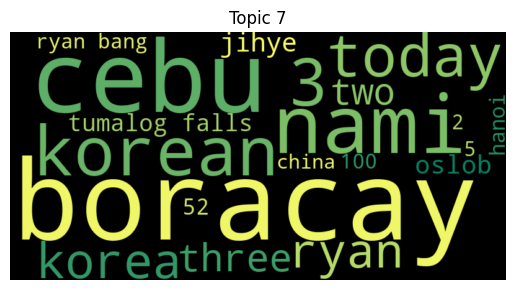

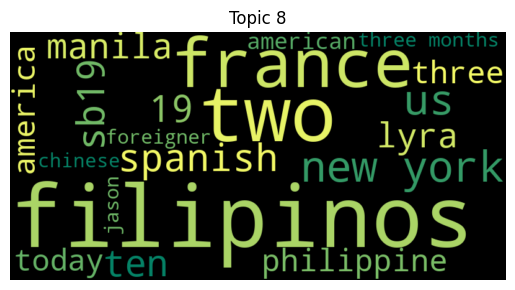

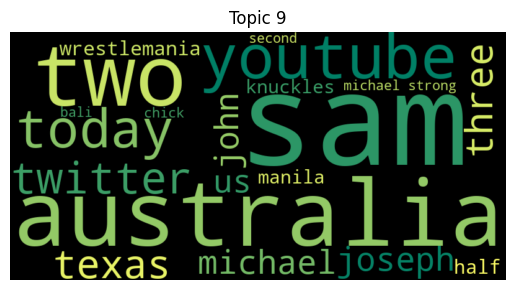

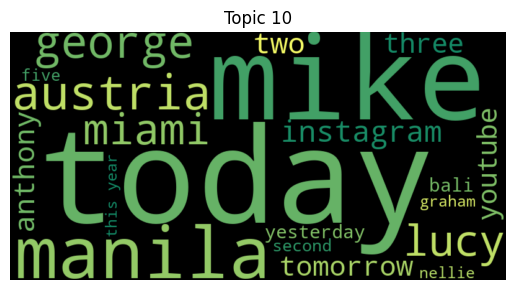

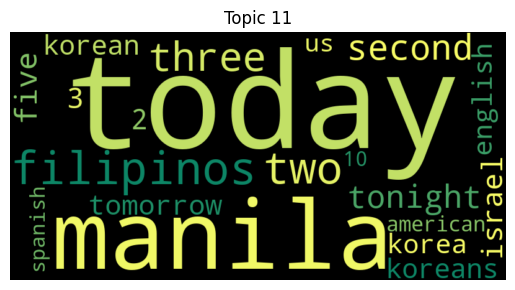

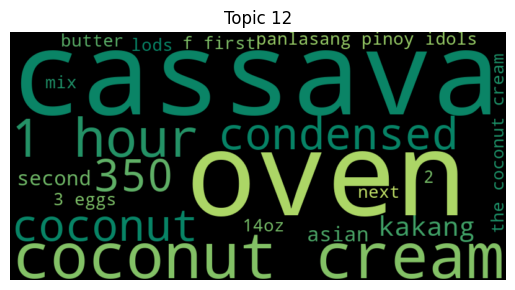

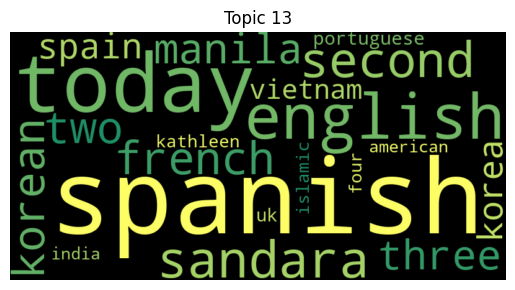

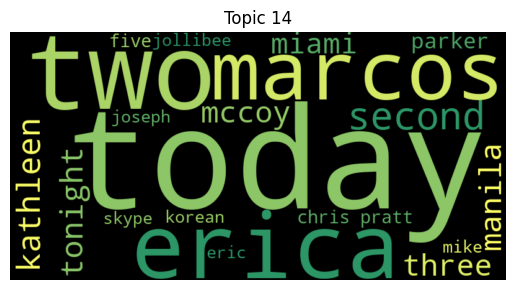

In [78]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

for topic_id in range(lda_model.num_topics):
    words = dict(lda_model.show_topic(topic_id, 20))
    wordcloud = WordCloud(width=800, height=400, colormap='summer').generate_from_frequencies(words)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_id}")
    plt.show()

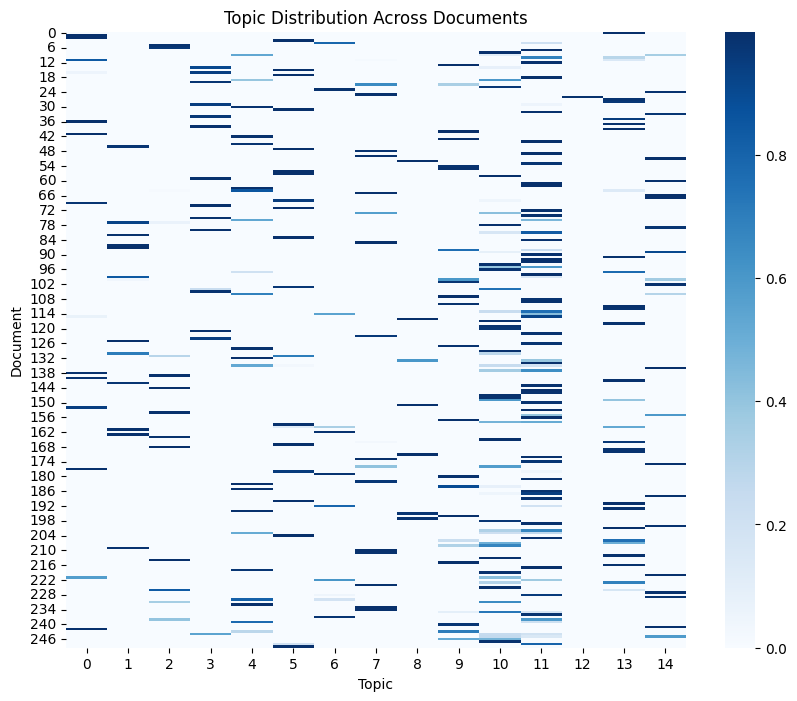

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matrix of topic probabilities
topic_dist_matrix = np.zeros((len(corpus), lda_model.num_topics))

for i, doc_bow in enumerate(corpus):
    for topic_id, prob in lda_model.get_document_topics(doc_bow):
        topic_dist_matrix[i][topic_id] = prob

# Plot heatmap of topic distributions across documents
plt.figure(figsize=(10, 8))
sns.heatmap(topic_dist_matrix, cmap="Blues", cbar=True)
plt.title("Topic Distribution Across Documents")
plt.xlabel("Topic")
plt.ylabel("Document")
plt.show()